<a href="https://colab.research.google.com/github/varsh-21/Netflix_Reccomendation/blob/main/Netflix_Recommendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


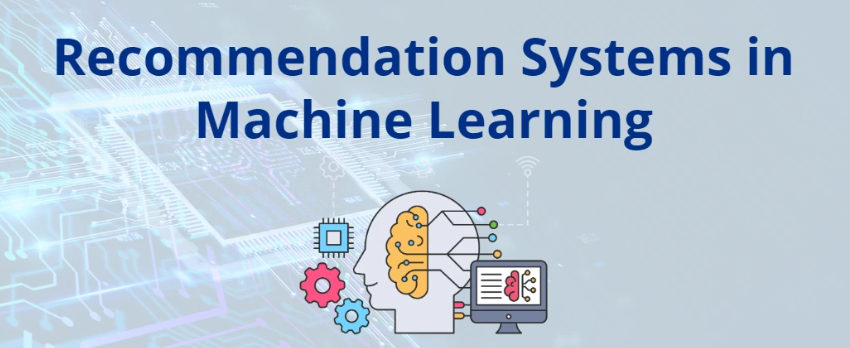

# **Netflix Recommendation Engine**

**What are Recommender Systems?**

Recommender systems are algorithms designed to suggest relevant items to users. These systems are used in various domains such as e-commerce, streaming services, and social media. They enhance user experience by filtering vast amounts of information to deliver personalized content.

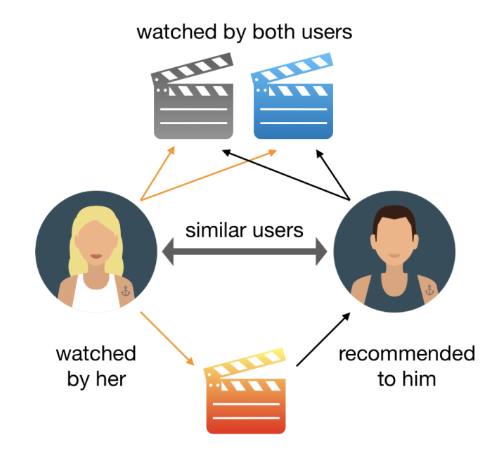



Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

netflix_dataset = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

In [ ]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

In [ ]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count  # In Customer id column we will remove movie id to get how many total rating are there
rating_count

24053764

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


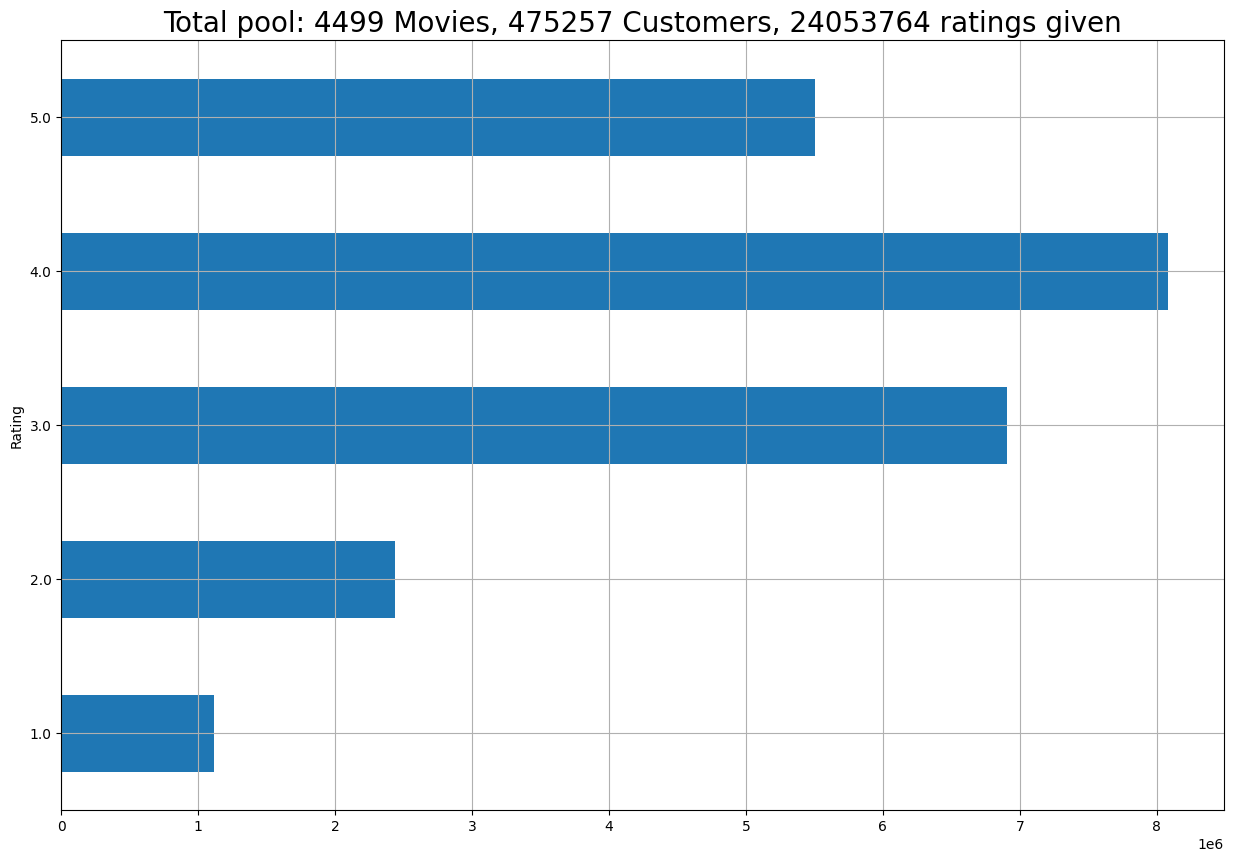

In [ ]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None

movie_np =[]


# Iterate over the DataFrame rows


for cust_id in netflix_dataset['Cust_Id']:

    if ':' in cust_id:

      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [ ]:
def abc():
  None


In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# t excludes rows where the 'Rating' is NaN)to keep only the rows where the 'Rating' column is not null (i.e., i

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

<ipython-input-27-3979ed240fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6))
movie_benchmark

908

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
4499-2699  #movies left

1800

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6))
cust_benchmark

36

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print(netflix_dataset.shape)

(19695836, 3)


In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Singular Value Decomposition, or SVD for short, is a powerful
mathematical tool used in data analysis and machine learning. At its core, SVD is a method for decomposing a matrix into its
constituent parts, which can be thought of as a way to extract
meaningful information from complex data. This makes it an incredibly
useful tool for a wide range of applications, from image compression to
natural language processing.


So why is this useful?

• Well, SVD can be used for a variety of tasks, such as data
compression, noise reduction, and feature extraction. It is particularly
useful in machine learning and data analysis, where it can be used to
identify patterns and relationships in large datasets. By breaking
down a matrix into its constituent parts, we can gain a deeper
understanding of the data and make more informed decisions based
on our findings.


Applications of SVD in Python


• SVD has proven to be a powerful tool in various applications, including image
compression, recommendation systems, and natural language processing. In image
compression, SVD is used to reduce the size of an image without losing significant
amounts of information. This is achieved by decomposing the image into its singular
values and retaining only the most important ones. The result is a compressed image
that takes up less space while still maintaining its quality.

 • In recommendation systems, SVD is used to analyze user behavior and predict their
preferences. By decomposing the user-item matrix, SVD can identify hidden patterns and
relationships between users and items, allowing for more accurate recommendations. Similarly, in natural language processing, SVD can be used to analyze large datasets of
text and identify semantic relationships between words and phrases. This allows for
more accurate language modeling and text prediction.

# **Model Building**

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix Data IP Ashwin/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
! pip install scikit-surprise

'''
The surprise library in Python is used for building and analyzing recommender systems. It provides tools to work with collaborative
 filtering algorithms,
which are commonly used to recommend items (such as movies, books, or products) to users based on their past interactions or preferences.
'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357276 sha256=8d74da749f95a64daf9a9e1e77d2ddc87c80593ce995519d7c71474c4cd347bc
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


'\nThe surprise library in Python is used for building and analyzing recommender systems. It provides tools to work with collaborative\n filtering algorithms,\nwhich are commonly used to recommend items (such as movies, books, or products) to users based on their past interactions or preferences.\n'

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:
model=SVD()  # Creating a SVD model

In [ ]:
cross_validate(model, data, measures=['RMSE'], cv=3)

{'test_rmse': array([1.0187105 , 1.01587341, 1.01934377]),
 'fit_time': (1.4239206314086914, 1.7357525825500488, 2.145331382751465),
 'test_time': (0.42926931381225586, 0.5861606597900391, 0.16657495498657227)}

# **Recommendation**

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Filter the dataset for the specific user
user_ratings = netflix_dataset[netflix_dataset['Cust_Id'] == 1055714 ]
user_ratings

,Cust_Id,Rating,Movie_Id
42163,1055714,5.0,18
92227,1055714,4.0,28
210936,1055714,2.0,30
262254,1055714,5.0,57
279656,1055714,5.0,58
...,...,...,...
23805263,1055714,5.0,4432
23945242,1055714,4.0,4472
23977663,1055714,5.0,4479
24018719,1055714,5.0,4488


In [ ]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_ratings['Movie_Id'].nunique()

movies_rated_by_user

253

In [ ]:
user_1055714	=df_title.copy()   #making a copy for each individual customer for the recomendation
user_1055714

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1055714=user_1055714[~user_1055714['Movie_Id'].isin(drop_movie_list)]
user_1055714

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)

# predict the score (rating) that a user (with user ID 1331154) might give to a list of movies.

<ipython-input-81-8184e2feb582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1055714['Estimate_Score']=user_1055714['Movie_Id'].apply(lambda x: model.predict(1055714, x).est)


In [ ]:
user_1055714

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.284493
4,5,2004.0,The Rise and Fall of ECW,3.713368
5,6,1997.0,Sick,2.927818
7,8,2004.0,What the #$*! Do We Know!?,3.407876
15,16,1996.0,Screamers,3.937663
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.690518
17766,17767,2004.0,Fidel Castro: American Experience,3.690518
17767,17768,2000.0,Epoch,3.690518
17768,17769,2003.0,The Company,3.690518


In [ ]:
user_1055714.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
17,18,1994.0,Immortal Beloved,4.232370
27,28,2002.0,Lilo and Stitch,3.987141
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.938541
15,16,1996.0,Screamers,3.937663
29,30,2003.0,Something's Gotta Give,3.800395
...,...,...,...,...
2,3,1997.0,Character,3.284493
5,6,1997.0,Sick,2.927818
16,17,2005.0,7 Seconds,2.866572
25,26,2004.0,Never Die Alone,2.781954


In [ ]:
top5_movies=user_1055714.sort_values('Estimate_Score', ascending=False).head(5)

In [ ]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
17,18,1994.0,Immortal Beloved,4.232370
27,28,2002.0,Lilo and Stitch,3.987141
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.938541
15,16,1996.0,Screamers,3.937663
29,30,2003.0,Something's Gotta Give,3.800395
